In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn.model_selection import train_test_split

In [28]:
item = 'HousePrices' 
package = 'AER'

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [30]:
df.shape

(546, 12)

In [32]:
df.isna().sum() ## наличие пропусков

price         0
lotsize       0
bedrooms      0
bathrooms     0
stories       0
driveway      0
recreation    0
fullbase      0
gasheat       0
aircon        0
garage        0
prefer        0
dtype: int64

In [34]:
df[df.duplicated()] ## наличие дубликатов строк

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
534,82000,5000,3,1,3,yes,no,no,no,yes,0,no


In [36]:
df = df.drop_duplicates()

In [38]:
df.shape ## результат очистки данных

(545, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 545 entries, 0 to 545
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   price       545 non-null    int64 
 1   lotsize     545 non-null    int64 
 2   bedrooms    545 non-null    int64 
 3   bathrooms   545 non-null    int64 
 4   stories     545 non-null    int64 
 5   driveway    545 non-null    object
 6   recreation  545 non-null    object
 7   fullbase    545 non-null    object
 8   gasheat     545 non-null    object
 9   aircon      545 non-null    object
 10  garage      545 non-null    int64 
 11  prefer      545 non-null    object
dtypes: int64(6), object(6)
memory usage: 55.4+ KB


Проверили и очистили данные от пропусков и дубликатов. Данный датасет имел одну строку дублей, пропусков не обнаружено. Также установленно, что необходимости конвертации признаков нет.

## Для данного набора данных нашего датасета мы можем сформулировать задачу регрессии, целью которой будет предсказание цен на жилье (например, стоимость дома) на основе различных факторов, таких как площадь, количество комнат, расположение и другие характеристики. Эта задача имеет практическую ценность для агентов недвижимости, строительных компаний и покупателей, которые хотят обоснованно оценивать стоимость недвижимости.

## 1.Разделение датасета

## Мы будем разделять выборку на обучающую (60%), и тестовую (40%). Затем тестовая выборка будет разделена пополам (20% и 20%).

In [209]:
df['recreation'] = df['recreation'].replace({'yes': 1, 'no': 0})
df['driveway'] = df['driveway'].replace({'yes': 1, 'no': 0})
df['fullbase'] = df['fullbase'].replace({'yes': 1, 'no': 0})
df['gasheat'] = df['gasheat'].replace({'yes': 1, 'no': 0})
df['aircon'] = df['aircon'].replace({'yes': 1, 'no': 0})
df['prefer'] = df['prefer'].replace({'yes': 1, 'no': 0}) # заменили все значения "yes" и " no" на числовые переменны для дальнейшего исследования

In [211]:
df

,price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500,4800,3,2,4,1,1,0,0,1,0,0
542,94000,6000,3,2,4,1,0,0,0,1,0,0
543,103000,6000,3,2,4,1,1,0,0,1,1,0
544,105000,6000,3,2,2,1,1,0,0,1,1,0


In [213]:
cat_vars = ['driveway', 'recreation', 'fullbase', 'gasheat', 'aircon', 'prefer' ]
num_vars = ['lotsize', 'bedrooms', 'bathrooms', 'stories', 'garage']
target_var = ['price']

In [215]:
X_dummies = pd.get_dummies(df[cat_vars], drop_first = True, dtype = int)
X_dummies.head()

,driveway,recreation,fullbase,gasheat,aircon,prefer
0,1,0,1,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,1,0,0,0,0
4,1,0,0,0,0,0


In [217]:
X = df[num_vars]
X = pd.merge(
    left = X,
    right = X_dummies,
    how = 'inner',
    left_index = True,
    right_index = True
)

y = df[target_var]

In [219]:
X

,lotsize,bedrooms,bathrooms,stories,garage,driveway,recreation,fullbase,gasheat,aircon,prefer
0,5850,3,1,2,1,1,0,1,0,0,0
1,4000,2,1,1,0,1,0,0,0,0,0
2,3060,3,1,1,0,1,0,0,0,0,0
3,6650,3,1,2,0,1,1,0,0,0,0
4,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
541,4800,3,2,4,0,1,1,0,0,1,0
542,6000,3,2,4,0,1,0,0,0,1,0
543,6000,3,2,4,1,1,1,0,0,1,0
544,6000,3,2,2,1,1,1,0,0,1,0


In [221]:
target = 'price'  # price наша целевая переменная
features = df.columns[df.columns != target]

In [223]:
# Разделение на обучающую и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(df[features], df[target], test_size=0.4, random_state=42)

In [225]:
X_train.shape

(327, 11)

In [227]:
X_temp.shape

(218, 11)

In [229]:
# Разделение тестовой выборки на две половины
X_val, X_forecast, y_val, y_forecast = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [231]:
X_val.shape

(109, 11)

In [233]:
X_forecast.shape

(109, 11)

In [311]:
# Вывод форм размерностей выборок
print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер валидационной выборки:", X_val.shape, y_val.shape)
print("Размер выборки для прогнозирования:", X_forecast.shape)

Размер обучающей выборки: (327, 11) (327,)
Размер валидационной выборки: (109, 11) (109,)
Размер выборки для прогнозирования: (109, 11)


## 2. Обучение моделей и оценка качества
Теперь обучим три различные модели регрессии и оценим их качество на первой половине тестовой выборки.

## Этот процесс позволит нам получить представление о качестве разных моделей для предсказания цен на жилье. Сравнив метрики , мы сможете выявить, какая из моделей показывает лучшее обобщение на валидационных данных. После этого мы сможете использовать более лучшие модели для создания прогнозов на второй половине тестовой выборки, где значения таргета будут неизвестны.

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [247]:
y_pred = ols.predict(X_temp)

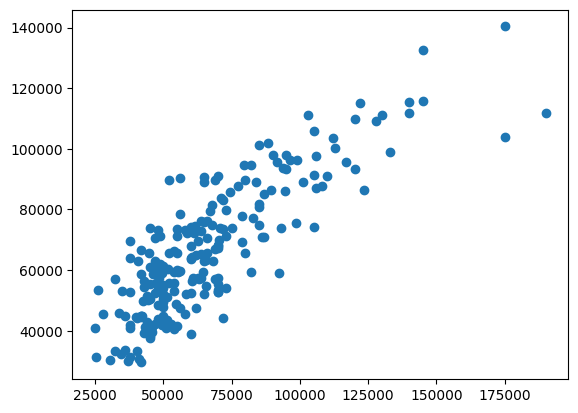

In [253]:
plt.scatter(y_temp, y_pred)
plt.show()

In [ ]:
## Будем использовать следующие метрики качества модели регрессии: R2, MAE, MAPE, RMSE.

In [255]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
print('R2', r2_score(y_temp, y_pred))
print('MAE', mean_absolute_error(y_temp, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_temp, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_temp, y_pred))

R2 0.695139507735769
MAE 11469.288790989865
RMSE 15498.110758751054
MAPE 0.18416697019652556


In [332]:
df[target_var].mean()

price    68096.13211
dtype: float64

## Выводы после получения данных обученной модели LinearRegression: изучив диаграмму распределения, мы можем сказать, что предсказанные значения Y достаточно близки к фактическим значениям Y.  R2 - точность предсказанной модели (69,51%) достаточно высокая, MAPE - % ошибки (18,41%) достаточно низкий. 

# Пробуем другие модели регрессии
SVM

In [267]:
from sklearn import svm
regr_svm = svm.SVR()
regr_svm.fit(X_train, y_train)

SVR()

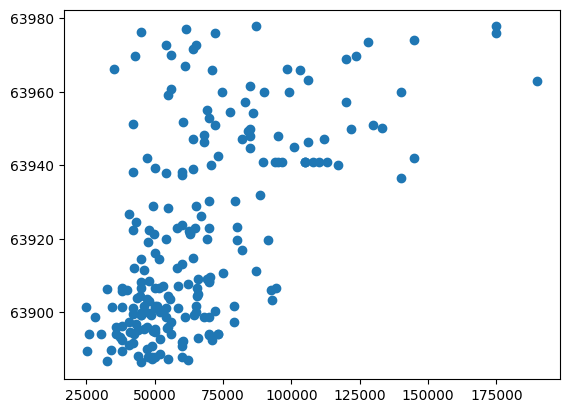

In [273]:
y_pred = regr_svm.predict(X_temp)
plt.scatter(y_temp, y_pred)
plt.show()

In [275]:
print('R2', r2_score(y_temp, y_pred))
print('MAE', mean_absolute_error(y_temp, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_temp, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_temp, y_pred))

R2 -0.008839675330517549
MAE 20261.114686591754
RMSE 28192.868383032128
MAPE 0.3173324314967688


## Выводы после получения данных обученной модели SVR : изучив диаграмму распределения, мы можем сказать, что предсказанные значения Y достаточно далеки от фактических значений Y, точки сильно разбросаны и не имеют определенной формы, это может указывать на то, что модель не очень хорошо подстраивается под данные и делает много ошибок в предсказаниях. R2 - точность предсказанной модели имеет очень низкое, отрицательное значение,  MAPE - % ошибки (31,7%) выше, чем в предсказанной выше модели LinearRegression.

SGD

In [280]:
from sklearn.linear_model import SGDRegressor
regr_sgd = SGDRegressor()
regr_sgd.fit(X_train, y_train)

SGDRegressor()

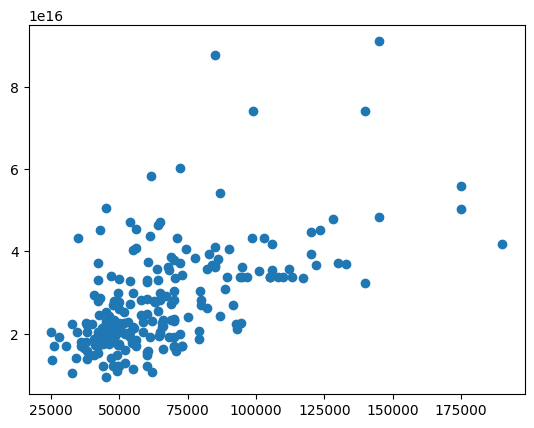

In [282]:
y_pred = regr_sgd.predict(X_temp)
plt.scatter(y_temp, y_pred)
plt.show()

In [325]:
print('R2', r2_score(y_temp, y_pred))
print('MAE', mean_absolute_error(y_temp, y_pred))
print('RMSE', np.sqrt(mean_squared_error(y_temp, y_pred)))
print('MAPE', mean_absolute_percentage_error(y_temp, y_pred))

R2 0.3427478835762662
MAE 15965.160550458715
RMSE 22755.90875228238
MAPE 0.25504362756408444


## Выводы после получения данных обученной модели SGDRegressor: изучив диаграмму распределения, мы можем сказать, что предсказанные значения Y достаточно далеки от фактических значений Y, точки сильно разбросаны и не имеют определенной формы, это может указывать на то, что модель не очень хорошо подстраивается под данные и делает много ошибок в предсказаниях. R2 - точность предсказанной модели имеет значение (34,2%), что ниже значения по модели  LinearRegression. MAPE - % ошибки (25.55%) выше, чем в предсказанной выше модели LinearRegression.

Decision Tree

In [287]:
from sklearn import tree
regr_tree = tree.DecisionTreeRegressor()
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor()

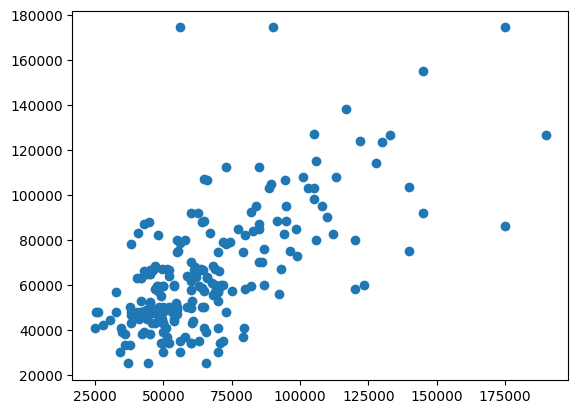

In [289]:
y_pred = regr_tree.predict(X_temp)
plt.scatter(y_temp, y_pred)
plt.show()

## Выводы после получения данных обученной модели DecisionTreeRegressor: Изучив диаграмму распределения, мы можем сказать, что предсказанные значения Y достаточно далеки от фактических значений Y, точки сильно разбросаны, это может указывать на то, что модель не очень хорошо подстраивается под данные и делает много ошибок в предсказаниях. 

## Изучив выше перечисленные модели можем сделать вывод, что наиболее подходящая модель для предсказаний является LinearRegression, на основе которой мы и будем строить дальнейшие предсказания.

# 3. На основе второй половины тестовой выборки сделаем предсказание целевой переменной.

In [356]:
# Подготовка и масштабирование второй половины тестовой выборки
X_forecast_scaled = scaler.transform(X_forecast)

In [358]:
# Обучение модели Linear Regression 
best_model = LinearRegression()  
best_model.fit(X_train_scaled, y_train)

LinearRegression()

In [362]:
# Предсказание на второй половине выборки
y_forecast_pred = best_model.predict(X_forecast_scaled)
print("Предсказанные значения цен на недвижимость:", y_forecast_pred)

Предсказанные значения цен на недвижимость: [ 60057.23070747  71230.38472975  78526.31239423  53474.2557908
  90813.64153624  86560.32652321  61865.31935388  49555.2626372
  52000.74979729  87165.74437473  89000.00269409  50373.26953238
  41364.71518551  59081.68767711  66153.92066088  73614.24606823
  56956.15718917  74397.26209372  39476.8305823   45984.6674111
  42988.05544116  52159.61087159  93272.99089435  41752.8389118
  56393.6586399  111682.23588581  87818.01109249  57524.23399558
  59432.03239374  40878.50647387  30587.35810763  91380.94258165
  50588.45614943  67415.08499483  63513.43109608  79867.78589524
  33649.62974794  69945.00337808 101378.12184124  44487.76291477
  50163.02352675  57478.55680991 132702.62891755  45642.50860491
  89106.72841671  85984.71884222  57484.82236044  93596.85529407
  74961.88759971  95756.07529471  52902.41857012  73727.71197178
  74069.63868029  73254.95614243  65544.81453775  69549.11555686
  54279.63408841  65496.01647364  47580.03974617  

In [364]:
# Можем использовать предсказанные значения как средние для принятия решений
mean_predicted = np.mean(y_forecast_pred)
print("Средняя предсказанная цена:", mean_predicted)

Средняя предсказанная цена: 66819.86831773198


In [366]:
# Рекомендации по преобретению недвижимости
for i, predicted_price in enumerate(y_forecast_pred):
    if predicted_price < mean_predicted:
        print(f"Экземпляр {i+1}: Предполагаемая цена {predicted_price:.2f}. Рекомендуем рассмотреть данный экземпляр, так как цена ниже средней.")
    else:
        print(f"Экземпляр {i+1}: Предполагаемая цена {predicted_price:.2f}. Цену можно считать выше средней, стоит учесть дополнительные факторы.")

Экземпляр 1: Предполагаемая цена 60057.23. Рекомендуем рассмотреть данный экземпляр, так как цена ниже средней.
Экземпляр 2: Предполагаемая цена 71230.38. Цену можно считать выше средней, стоит учесть дополнительные факторы.
Экземпляр 3: Предполагаемая цена 78526.31. Цену можно считать выше средней, стоит учесть дополнительные факторы.
Экземпляр 4: Предполагаемая цена 53474.26. Рекомендуем рассмотреть данный экземпляр, так как цена ниже средней.
Экземпляр 5: Предполагаемая цена 90813.64. Цену можно считать выше средней, стоит учесть дополнительные факторы.
Экземпляр 6: Предполагаемая цена 86560.33. Цену можно считать выше средней, стоит учесть дополнительные факторы.
Экземпляр 7: Предполагаемая цена 61865.32. Рекомендуем рассмотреть данный экземпляр, так как цена ниже средней.
Экземпляр 8: Предполагаемая цена 49555.26. Рекомендуем рассмотреть данный экземпляр, так как цена ниже средней.
Экземпляр 9: Предполагаемая цена 52000.75. Рекомендуем рассмотреть данный экземпляр, так как цена ни

# Проходимся по предсказанным значениям и выдаем рекомендации для каждого экземпляра: если предсказываемая цена ниже среднего значения, мы рекомендуем обратить внимание на эту недвижимость, так как цена ниже средней; в противном случае мы сообщаем, что стоимость может быть выше средней, и стоит рассмотреть дополнительные факторы. 
Таким образом,можнот использовать эти рекомендации как часть анализа рынка недвижимости.

# 
На основе выполненного анализа и предсказаний целевой переменной потенциальные пользователи, такие как агентства недвижимости или покупатели, могут получить следующие рекомендации а
Анализ факторов, влияющих на ц,нп: По данным модели можно выделить важные характеристики, которые повышают или понижают стоимость жи; о.
Оценка инвестиционной привлекательн, пи: Потенциальные покупатели могут использовать эту информацию для принятия обоснованных решений о покупке недвижим; си.
Создание улучшенных предло,еаий: Агенты могут предлагать индивидуализированные рекомендации для клиентов на основе их предпочтений и рыночных д. 
С помощью этих шаговмыы сможме не только построить модель, но и подготовить полное обоснование для практического применения в области недвиимостижимости.